In [55]:
import json
from functools import partial

import networkx as nx
import pandas as pd
from networkx.readwrite.json_graph import node_link_graph
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('log_cycles.csv', sep=";")
df["bundled_cycle"] = df["bundled_cycle"].apply(json.loads).apply(partial(node_link_graph, edges="edges"))


In [57]:
df["m"] = df["bundled_cycle"].apply(lambda x: x.number_of_edges())
df["n"] = df["bundled_cycle"].apply(lambda x: x.number_of_nodes())

None


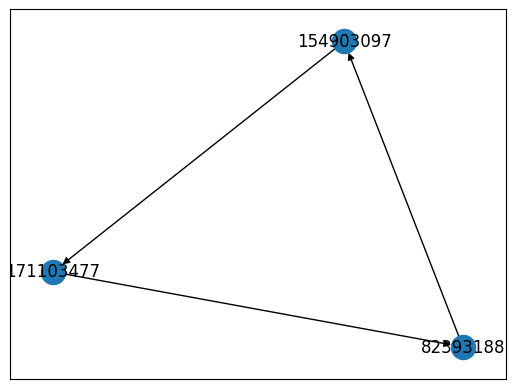

None


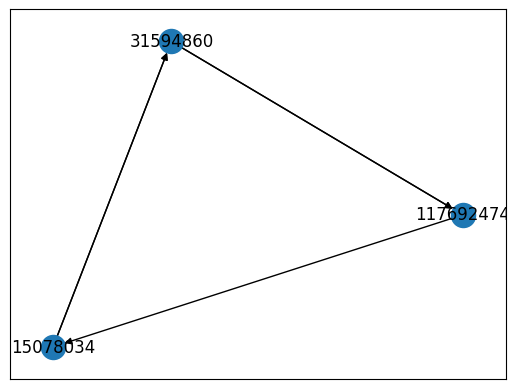

<Figure size 640x480 with 0 Axes>

In [58]:
# for i, row in df[df["m"] > df["n"]].iterrows():
for i, row in df[df["n"] > 2].iterrows():
    print(nx.draw_networkx(row["bundled_cycle"]))
    plt.show()
    plt.clf()

In [59]:
df

,seed_begin,seed_end,next_seed_begin,candidates,bundled_cycle,m,n
0,13332342,13332350,13332352,"[157572812, 123971924]","(157572812, 123971924)",2,2
1,13335208,13335218,13335218,"[62951797, 132842757]","(62951797, 132842757)",2,2
2,13344885,13344894,13344895,"[276109, 5421825, 69449194, 155478018]","(276109, 5421825)",2,2
3,13345697,13345707,13345707,"[36135192, 57401112]","(36135192, 57401112)",2,2
4,13346135,13346142,13346145,"[347974, 129735901]","(347974, 129735901)",2,2
...,...,...,...,...,...,...,...
537,13926943,13926953,13926953,"[8784780, 32256380, 12887121]","(8784780, 32256380)",2,2
538,13927020,13927029,13927030,"[80109877, 164678020]","(80109877, 164678020)",2,2
539,13927519,13927528,13927529,"[8706252, 10937297]","(8706252, 10937297)",2,2
540,13929378,13929384,13929388,"[94679809, 65109957]","(94679809, 65109957)",2,2


In [60]:
df[df["n"] > 2]

,seed_begin,seed_end,next_seed_begin,candidates,bundled_cycle,m,n
248,13612006,13612016,13612016,"[154903097, 66006568, 82393188, 13085470, 1227...","(171103477, 82393188, 154903097)",3,3
261,13651283,13651292,13651293,"[31594860, 15078034, 117692474]","(117692474, 15078034, 31594860)",5,3
